In [166]:
import numpy as np
import pandas as pd
import os
import sys
import copy
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
warnings.filterwarnings('ignore')
sns.set()
%matplotlib inline

In [132]:
filepath = os.getcwd()+"/diabetes.csv"
print(filepath)

/Users/rock/Data Science/Practice/diabetes.csv


In [133]:
df = pd.read_csv(filepath)
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [134]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [161]:
print('Number of sample records : {}'.format(df.shape[0]))
print('\n')
print('Number of covariates/columns/predictors : {}'.format(df.shape[1]))
print('\n')
columns = df.columns.to_list()
print('Dependent\Response variable : {}'.format(columns[len(columns)-1]))
print('\n')
print('Distinct Response variable values : {}'.format(df[columns[len(columns)-1]].unique()))
print('\n')
columns.remove('Outcome')
print('Independent\Predictors variables : {}'.format(columns))
print('\n')
print(df.describe())
print('\n')

Number of sample records : 768


Number of covariates/columns/predictors : 9


Dependent\Response variable : Outcome


Distinct Response variable values : [1 0]


Independent\Predictors variables : ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

 

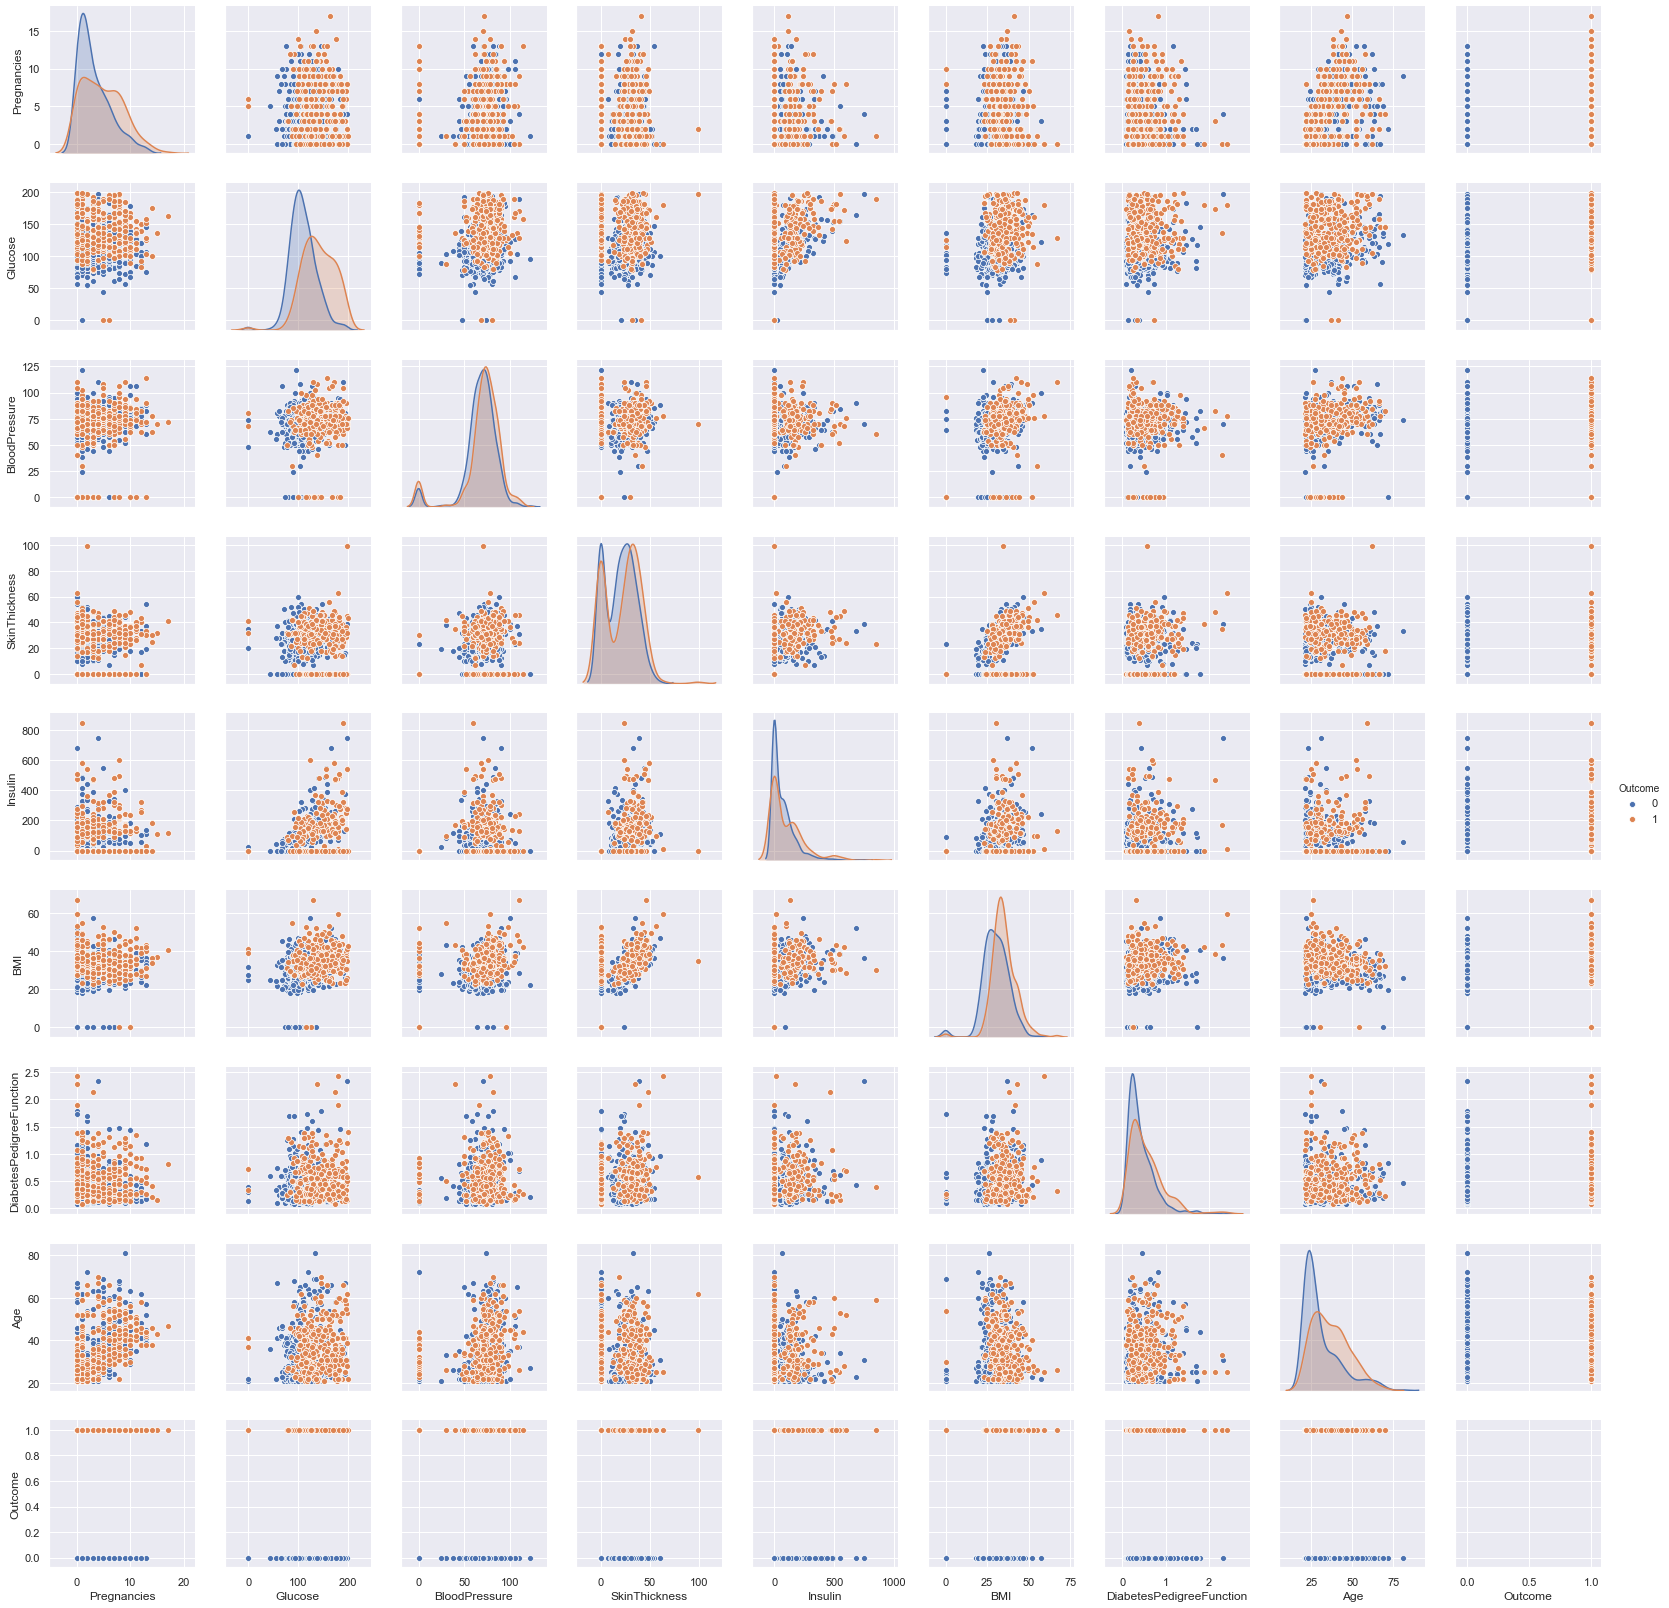

In [136]:
# fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(8,3))
# # # fig.subplots_adjust(wspace=1)
# plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)

# axes[0,0].title.set_text("Pregnancies vs Glucose")
# axes[0,0].scatter(df['Pregnancies'],df['Glucose'])
# axes[0,0].tick_params(axis ='x', rotation = 20)

# axes[0,1].title.set_text("Pregnancies vs BloodPressure")
# axes[0,1].scatter(df['BloodPressure'],df['Glucose'])
# axes[0,1].tick_params(axis ='x', rotation = 20)

# axes[1,0].title.set_text("Pregnancies vs SkinThickness")
# axes[1,0].scatter(df['Pregnancies'],df['SkinThickness'])
# axes[1,0].tick_params(axis ='x', rotation = 20)

# axes[1,1].title.set_text("Pregnancies vs Insulin")
# axes[1,1].scatter(df['BloodPressure'],df['Insulin'])
# axes[1,1].tick_params(axis ='x', rotation = 20)

# axes[1,1].title.set_text("Pregnancies vs BMI")
# axes[1,1].scatter(df['BloodPressure'],df['Insulin'])
# axes[1,1].tick_params(axis ='x', rotation = 20)

# axes[1,1].title.set_text("Pregnancies vs DiabetesPedigreeFunction")
# axes[1,1].scatter(df['BloodPressure'],df['Insulin'])
# axes[1,1].tick_params(axis ='x', rotation = 20)

# axes[1,1].title.set_text("Pregnancies vs Age")
# axes[1,1].scatter(df['BloodPressure'],df['Insulin'])
# axes[1,1].tick_params(axis ='x', rotation = 20)


# axes[1,1].title.set_text("Glucose vs BloodPressure")
# axes[1,1].scatter(df['BloodPressure'],df['Insulin'])
# axes[1,1].tick_params(axis ='x', rotation = 20)

# axes[1,1].title.set_text("Glucose vs SkinThickness")
# axes[1,1].scatter(df['BloodPressure'],df['Insulin'])
# axes[1,1].tick_params(axis ='x', rotation = 20)

# axes[1,1].title.set_text("Glucose vs Insulin")
# axes[1,1].scatter(df['BloodPressure'],df['Insulin'])
# axes[1,1].tick_params(axis ='x', rotation = 20)

# axes[1,1].title.set_text("Glucose vs BMI")
# axes[1,1].scatter(df['BloodPressure'],df['Insulin'])
# axes[1,1].tick_params(axis ='x', rotation = 20)

# axes[1,1].title.set_text("Glucose vs DiabetesPedigreeFunction")
# axes[1,1].scatter(df['BloodPressure'],df['Insulin'])
# axes[1,1].tick_params(axis ='x', rotation = 20)

# plt.tight_layout()
# plt.show()

sns.pairplot(df, hue='Outcome', size=2.5);

0    500
1    268
Name: Outcome, dtype: int64


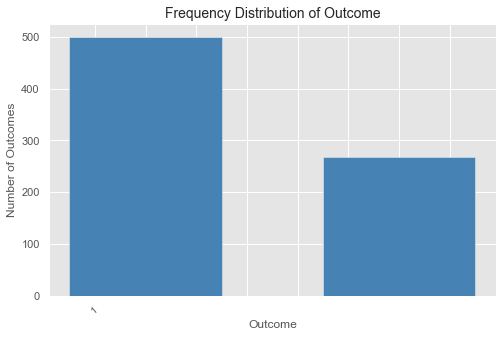

In [164]:
fig,axes = plt.subplots(nrows=1,ncols=1,figsize=(8,5))

outcome_count = df['Outcome'].value_counts()
print(outcome_count)

plt.style.use('ggplot')

axes.bar(outcome_count.index, outcome_count.values, width=.6, color='steelblue')
axes.set_title('Frequency Distribution of Outcome',size=14)
axes.set_ylabel('Number of Outcomes', fontsize=12)
axes.set_xlabel('Outcome', fontsize=12)
axes.set_xticklabels(outcome_count.index, rotation=40, size=10)
plt.show()

In [138]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [139]:
df.describe().loc[['mean','std','25%','75%']]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000


In [199]:
df_1 = copy.deepcopy(df)
print(df_1['Outcome'].unique())
print(columns,'\n\n')
for column in columns:
    print('Column --> %s'%column)
    Q3 = df_1[column].describe().loc[['75%']][0]
    Q1 = df_1[column].describe().loc[['25%']][0]
    IQR = Q3 - Q1
    upper_limit = Q3+(1.5*IQR)
    lower_limit = Q1-(1.5*IQR)
    print('upper_limit & lower_limit : {} & {}'.format(upper_limit,lower_limit))
    #print([i for i in df_1[column] if (i < lower_limit or i > upper_limit)])
    upper_limit_outliers = [i for i in df_1[column] if (i > upper_limit)]
    lower_limit_outliers = [i for i in df_1[column] if (i < lower_limit)]
    print('upper_limit & lower_limit outliers : {} & {}\n\n'.format(upper_limit_outliers,lower_limit_outliers))
    
    #Imputing/capping upper limit outliers 
    if len(upper_limit_outliers) > 1:
        #print('Upper limit outliers :')
        #print(df_1[df_1[column]>upper_limit][column])
        upper_limit_indexs = df_1[df_1[column]>upper_limit].index.tolist()  
        df_1[df_1[column] > upper_limit][column] = upper_limit
        #print(df_1.loc[upper_limit_indexs, column],'\n')
    
    #Imputing/capping lower limit outliers
    if len(lower_limit_outliers) > 1:
        #print('Lower limit outliers :')
        #print(df_1[df_1[column]<lower_limit][column])
        lower_limit_indexs = df_1[df_1[column]<lower_limit].index.tolist()  
        df_1[df_1[column] < lower_limit][column] = lower_limit
        #print(df_1.loc[lower_limit_indexs, column],'\n\n')

print('\n\n',df_1['Outcome'].unique())
    
#     #sys.exit(1)

[1 0]
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'] 


Column --> Pregnancies
upper_limit & lower_limit : 13.5 & -6.5
upper_limit & lower_limit outliers : [15, 17, 14, 14] & []


Column --> Glucose
upper_limit & lower_limit : 202.125 & 37.125
upper_limit & lower_limit outliers : [] & [0, 0, 0, 0, 0]


Column --> BloodPressure
upper_limit & lower_limit : 107.0 & 35.0
upper_limit & lower_limit outliers : [110, 108, 122, 110, 108, 110, 114] & [0, 0, 30, 0, 0, 0, 0, 30, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 24, 0, 0, 0, 0, 0, 0, 0]


Column --> SkinThickness
upper_limit & lower_limit : 80.0 & -48.0
upper_limit & lower_limit outliers : [99] & []


Column --> Insulin
upper_limit & lower_limit : 318.125 & -190.875
upper_limit & lower_limit outliers : [543, 846, 342, 495, 325, 485, 495, 478, 744, 370, 680, 402, 375, 545, 360, 325, 465, 325, 415, 579, 474, 328, 480, 326, 330, 600, 321, 440, 540, 480,

In [200]:
df.describe().loc[['mean','std','25%','75%']]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000


In [201]:
df_1.describe().loc[['mean','std','25%','75%']]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000


### Key Note :
* All the above methods(Zscore_3sigma rule/Inter quantile range) are good for initial analysis of data, but they don’t have much value in multivariate settings or with high dimensional data. For such datasets, we have to use advanced methods like PCA, LOF (Local Outlier Factor) & HiCS: High Contrast Subspaces for Density-Based Outlier Ranking.
* After imputing outliers with interquantile upper/lower limits the mean/std variance of data are getting totally changed which is wrong.

In [146]:
X = df.drop(['Outcome'],axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [149]:
logmodel = LogisticRegression()

logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [150]:
predictions = logmodel.predict(X_test)

In [152]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.91      0.84       150
           1       0.76      0.56      0.64        81

    accuracy                           0.78       231
   macro avg       0.78      0.73      0.74       231
weighted avg       0.78      0.78      0.77       231



In [170]:
# Create confusion matrix
pd.crosstab(y_test, predictions, rownames=['Actual Outcomes'], colnames=['Predicted Outcomes'])

Predicted Outcomes,0,1
Actual Outcomes,,
0,136,14
1,36,45


In [155]:
print('Accuracy Score :',round(accuracy_score(y_test, predictions),4))

Accuracy Score : 0.7835


In [167]:
# Create a random forest Classifier. By convention, clf means 'Classifier'
clf = RandomForestClassifier(random_state=0, n_estimators=10)

# Train the Classifier to take the training features and learn how they relate
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [168]:
#Predicting Activity class
preds = clf.predict(X_test)

In [169]:
# Create confusion matrix
pd.crosstab(y_test, preds, rownames=['Actual Outcomes'], colnames=['Predicted Outcomes'])

Predicted Outcomes,0,1
Actual Outcomes,,
0,135,15
1,38,43


In [193]:
X = df_1.drop(['Outcome'],axis=1)
y = df_1['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [195]:
logmodel = LogisticRegression()

logmodel.fit(X_train,y_train)

predictions = logmodel.predict(X_test)

# Create confusion matrix
print(pd.crosstab(y_test, predictions, rownames=['Actual Outcomes'], colnames=['Predicted Outcomes']))

print('Accuracy Score :',round(accuracy_score(y_test, predictions),4))

Predicted Outcomes    0   1
Actual Outcomes            
0                   136  14
1                    36  45
Accuracy Score : 0.7835


In [205]:
# Create a random forest Classifier. By convention, clf means 'Classifier'
clf = RandomForestClassifier(random_state=0, n_estimators=5)

# Train the Classifier to take the training features and learn how they relate
clf.fit(X_train, y_train)

#Predicting Activity class
preds = clf.predict(X_test)

# Create confusion matrix
pd.crosstab(y_test, preds, rownames=['Actual Outcomes'], colnames=['Predicted Outcomes'])

Predicted Outcomes,0,1
Actual Outcomes,,
0,128,22
1,37,44


In [182]:
y_train

711    0.00000
58     1.54925
216    1.00000
168    0.00000
658    0.00000
        ...   
75     1.54925
599    0.00000
575    0.00000
337    1.00000
523    1.00000
Name: Outcome, Length: 537, dtype: float64

In [184]:
df['Outcome'].unique()

array([1, 0])